# Variables in Both Rows and columns
At times, data will be formatted so that variables are in both rows and columns, this method touch upon the 'pivot' of data from the long format to the wide format.

In [1]:
import pandas as pd
weather = pd.read_csv('../../data/weather.csv')
print(weather)

         id  year  month element    d1    d2    d3    d4    d5    d6  ...  \
0   MX17004  2010      1    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1   MX17004  2010      1    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2   MX17004  2010      2    tmax   NaN  27.3  24.1   NaN   NaN   NaN  ...   
3   MX17004  2010      2    tmin   NaN  14.4  14.4   NaN   NaN   NaN  ...   
4   MX17004  2010      3    tmax   NaN   NaN   NaN   NaN  32.1   NaN  ...   
5   MX17004  2010      3    tmin   NaN   NaN   NaN   NaN  14.2   NaN  ...   
6   MX17004  2010      4    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...   
7   MX17004  2010      4    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...   
8   MX17004  2010      5    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...   
9   MX17004  2010      5    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...   
10  MX17004  2010      6    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...   
11  MX17004  2010      6    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...   

The data gives minimum temperature and maximum temperature of each say of the month. 
The element column contains variables that need to be in wider format and be its own column.
The day variable needs to be melted into its own values.

In [3]:
weather_melt = weather.melt(
    id_vars=['id','year','month','element'],
    var_name='day',
    value_name='temp'
)

print(weather_melt)

          id  year  month element  day  temp
0    MX17004  2010      1    tmax   d1   NaN
1    MX17004  2010      1    tmin   d1   NaN
2    MX17004  2010      2    tmax   d1   NaN
3    MX17004  2010      2    tmin   d1   NaN
4    MX17004  2010      3    tmax   d1   NaN
..       ...   ...    ...     ...  ...   ...
677  MX17004  2010     10    tmin  d31   NaN
678  MX17004  2010     11    tmax  d31   NaN
679  MX17004  2010     11    tmin  d31   NaN
680  MX17004  2010     12    tmax  d31   NaN
681  MX17004  2010     12    tmin  d31   NaN

[682 rows x 6 columns]


In [5]:
weather_tidy = weather_melt.pivot_table(
    index=['id','year','month','day'],
    columns='element',
    values='temp'
)
print(weather_tidy)

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d

In [6]:
weather_tidy_flat = weather_tidy.reset_index()
print(weather_tidy_flat)

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1  d30  27.8  14.5
1        MX17004  2010      2  d11  29.7  13.4
2        MX17004  2010      2   d2  27.3  14.4
3        MX17004  2010      2  d23  29.9  10.7
4        MX17004  2010      2   d3  24.1  14.4
5        MX17004  2010      3  d10  34.5  16.8
6        MX17004  2010      3  d16  31.1  17.6
7        MX17004  2010      3   d5  32.1  14.2
8        MX17004  2010      4  d27  36.3  16.7
9        MX17004  2010      5  d27  33.2  18.2
10       MX17004  2010      6  d17  28.0  17.5
11       MX17004  2010      6  d29  30.1  18.0
12       MX17004  2010      7   d3  28.6  17.5
13       MX17004  2010      7  d14  29.9  16.5
14       MX17004  2010      8  d23  26.4  15.0
15       MX17004  2010      8   d5  29.6  15.8
16       MX17004  2010      8  d29  28.0  15.3
17       MX17004  2010      8  d13  29.8  16.5
18       MX17004  2010      8  d25  29.7  15.6
19       MX17004  2010      8  d31  25.4  15.4
20       MX17

we can also do this step without intermediate steps

In [7]:
weather_tidy = (
    weather_melt
    .pivot_table(
        index=['id','year','month','day'],
        columns='element',
        values='temp'
    ).reset_index()
)
print(weather_tidy)

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1  d30  27.8  14.5
1        MX17004  2010      2  d11  29.7  13.4
2        MX17004  2010      2   d2  27.3  14.4
3        MX17004  2010      2  d23  29.9  10.7
4        MX17004  2010      2   d3  24.1  14.4
5        MX17004  2010      3  d10  34.5  16.8
6        MX17004  2010      3  d16  31.1  17.6
7        MX17004  2010      3   d5  32.1  14.2
8        MX17004  2010      4  d27  36.3  16.7
9        MX17004  2010      5  d27  33.2  18.2
10       MX17004  2010      6  d17  28.0  17.5
11       MX17004  2010      6  d29  30.1  18.0
12       MX17004  2010      7   d3  28.6  17.5
13       MX17004  2010      7  d14  29.9  16.5
14       MX17004  2010      8  d23  26.4  15.0
15       MX17004  2010      8   d5  29.6  15.8
16       MX17004  2010      8  d29  28.0  15.3
17       MX17004  2010      8  d13  29.8  16.5
18       MX17004  2010      8  d25  29.7  15.6
19       MX17004  2010      8  d31  25.4  15.4
20       MX17

Analyzing Max and Min of temperature
Q1: plot a violin plot of the max and min temperature and the box plot

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


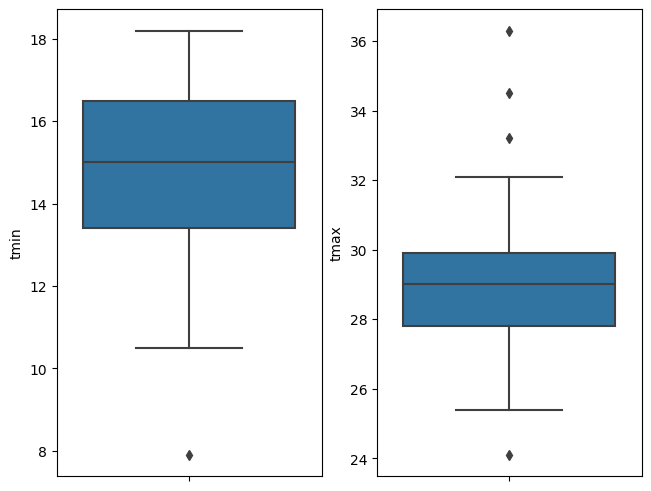

In [12]:
temp_boxplot, (ax1,ax2) =plt.subplots(1,2)

sns.boxplot(data=weather_tidy,y='tmin',ax=ax1)
sns.boxplot(data=weather_tidy,y='tmax',ax=ax2)

temp_boxplot.set_constrained_layout(True)

